In [110]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 15.0)

(615, 407)


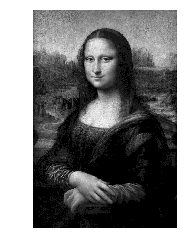

In [54]:
#read image
image = cv.imread("mona.png", cv.IMREAD_GRAYSCALE)
print(np.shape(image))
plt.axis("off")
plt.imshow(image, cmap="gray")
plt.show()

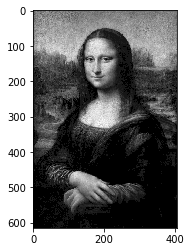

In [55]:
#grayscale image halved
image = (image / 2).astype("uint8")
plt.imshow(image, cmap="gray")


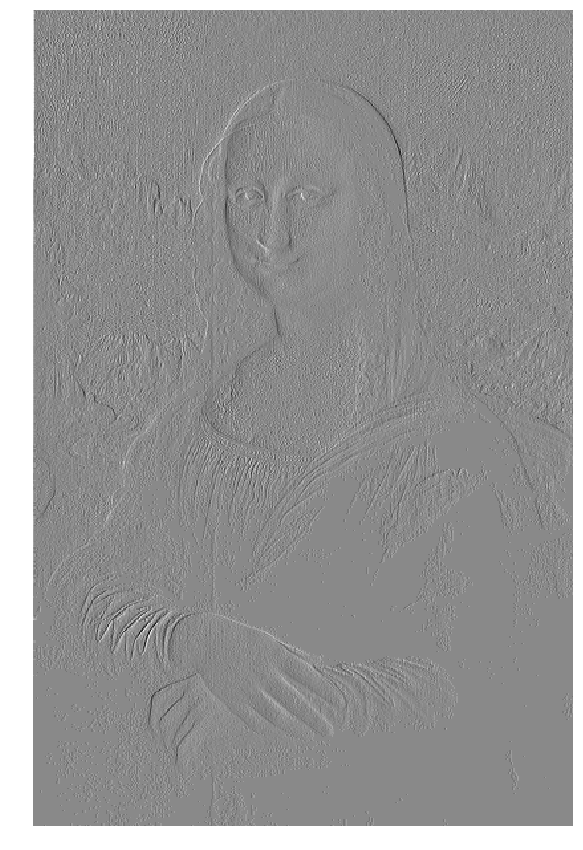

In [111]:
##construct neighboring image
neighboring_image = np.zeros(image.shape, dtype="uint8")
bias = 72 #72 is the minimum number that prevents overflow
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if j == 0:
            neighboring_image[i][j] = (image[i][j] + bias).astype("uint8")
        else:
            neighboring_image[i][j] = (bias + image[i][j - 1]).astype("uint8") - image[i][j]

plt.axis("off")
plt.imshow(neighboring_image, cmap="gray")



167 0
201 0
234 0
254 0


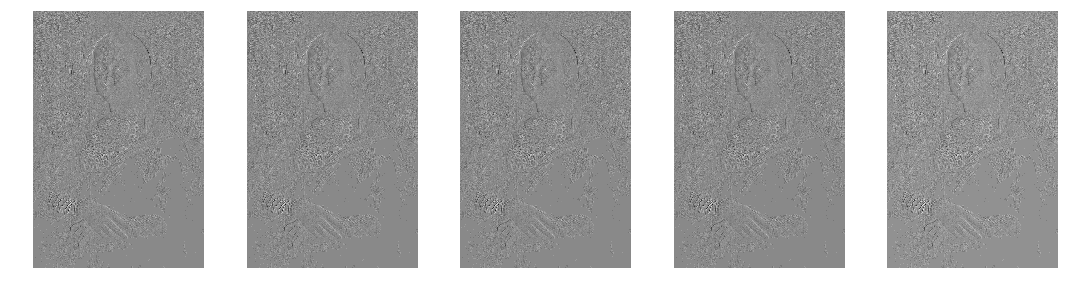

In [125]:
###scale neighboring image

current_image = (neighboring_image * 1).astype("uint8")
plt.subplot(1,5,1).axis("off")
plt.tight_layout()
plt.imshow(current_image, cmap="gray")
current_image = (neighboring_image * 1.25).astype("uint8")
print(current_image.max(), current_image.min())
plt.subplot(1,5,2).axis("off")
plt.tight_layout()
plt.imshow(current_image, cmap="gray")
current_image = (neighboring_image * 1.5).astype("uint8")
print(current_image.max(), current_image.min())
plt.subplot(1,5,3).axis("off")
plt.tight_layout()
plt.imshow(current_image, cmap="gray")
current_image = (neighboring_image * 1.75).astype("uint8")
print(current_image.max(), current_image.min())
plt.subplot(1,5,4).axis("off")
plt.tight_layout()
plt.imshow(current_image, cmap="gray")
current_image = (neighboring_image * 2).astype("uint8")
print(current_image.max(), current_image.min())
plt.subplot(1,5,5).axis("off")
plt.tight_layout()
plt.imshow(current_image, cmap="gray")


# contrast

As you can see in the images above, the contrast increases when the scalar value increases gradually from 1 to 2. This is because the difference between the pixels, also grows. Ofcourse in this case the differences are hardly visible, because the picture consists of the difference between two adjacent pixels in the original image, which are usually small numbers due to the smoothness of transition of colors.